# Handling the data

In [51]:
import sys
sys.path.insert(0, '/yunity/arusty/PF-GAP')

#Import libraries, MDS from SKlearn, and all the custom files
import pandas as pd
import matplotlib.pyplot as plt
from Pipeline.functions import *

#Functions
from QGAP.qgap import QGAP
from Redcomets.Redcomets import REDCOMETS
# from RFGAP_Rocket.RFGAP_Rocket import RFGAP_Rocket
# from RDST.rdst import RDST_GAP

In [52]:
static_data = pd.read_csv("/yunity/arusty/PF-GAP/data/sp500_fundamentals_combined.csv")
time_series = pd.read_csv("/yunity/arusty/PF-GAP/data/sp500_daily_returns_since_2022.csv")
stock_data = pd.read_csv("/yunity/arusty/PF-GAP/data/Labeled_11-01-2024_GICS.csv")

static_data.head()

,Ticker,Year,PE Ratio,PB Ratio,PS Ratio,ROE,ROA,Debt/Equity,Current Ratio,Profit Margin,Revenue Growth YoY,EPS Growth Next 5Y,Market Cap
0,MMM,2024,17.295145,16.742617,3.04910,1.086153,0.104670,312.492,1.657,0.169807,-0.010,0.221,74742579200
1,MMM,2023,17.295145,16.742617,3.04910,-1.455170,-0.138296,312.492,1.657,-0.284234,-0.010,0.221,74742579200
2,MMM,2022,17.295145,16.742617,3.04910,0.392406,0.124357,312.492,1.657,0.220825,-0.010,0.221,74742579200
3,AOS,2024,17.988981,5.003449,2.45474,0.283302,0.164691,12.132,1.552,0.139755,-0.077,-0.181,9372443648
4,AOS,2023,17.988981,5.003449,2.45474,0.301778,0.173185,12.132,1.552,0.144466,-0.077,-0.181,9372443648


In [53]:
time_series.head()

,Date,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
0,2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-04,0.014010,0.016633,-0.023518,-0.001920,-0.007146,-0.018374,-0.038738,0.002871,0.032779,...,0.009057,0.013160,-0.040422,-0.003190,0.006329,0.010608,0.005347,0.006337,0.010145,-0.038072
2,2022-01-05,-0.004106,-0.016714,-0.004493,0.005253,-0.017611,-0.071426,-0.057264,-0.045808,-0.001662,...,0.002244,-0.006955,-0.018968,-0.037033,0.009800,-0.013629,-0.012677,-0.050068,-0.003297,-0.038024
3,2022-01-06,-0.008301,0.006703,-0.000148,-0.004711,-0.048290,-0.000603,0.000588,-0.003858,0.018475,...,0.023880,-0.011265,0.009546,0.004629,-0.007822,-0.001373,0.010330,-0.005410,-0.008307,0.003971
4,2022-01-07,0.010955,-0.011296,0.003108,-0.002588,-0.019180,-0.006652,-0.031050,-0.006024,0.015852,...,0.020773,-0.011863,-0.001556,-0.001063,0.008759,-0.007992,-0.011466,-0.043771,-0.006050,-0.029114


In [54]:
stock_data.isnull().any().any(), time_series.isnull().any().any(), stock_data.shape, time_series.shape

(np.False_, np.True_, (503, 7), (830, 504))

In [55]:
# drop row with index 0 and reset index
time_series = time_series.drop(columns = ["Date"]).T.drop(columns = 0) #.dropna(axis=1).T

# show the first few rows
time_series.head()

,1,2,3,4,5,6,7,8,9,10,...,820,821,822,823,824,825,826,827,828,829
MMM,0.014010,-0.004106,-0.008301,0.010955,-0.014115,0.008850,0.002458,0.008917,-0.012595,-0.002574,...,-0.038678,0.022411,0.000441,-0.005514,-0.035487,-0.001916,-0.031641,0.081212,-0.001981,0.020726
AOS,0.016633,-0.016714,0.006703,-0.011296,-0.003127,0.009772,0.003345,-0.012384,-0.028575,0.001117,...,0.004955,0.025927,0.010853,-0.020705,-0.015505,0.004454,-0.022648,0.036461,-0.002345,0.023351
ABT,-0.023518,-0.004493,-0.000148,0.003108,-0.002213,0.003253,-0.014591,-0.027017,-0.011492,-0.012406,...,-0.019994,0.019116,0.008512,-0.009029,0.027571,0.009869,-0.008322,0.014166,-0.014348,-0.003543
ABBV,-0.001920,0.005253,-0.004711,-0.002588,0.011195,0.004252,0.002336,-0.017368,0.017600,0.006698,...,-0.031361,0.004879,0.023136,-0.003719,-0.028959,0.007631,-0.016359,0.021274,0.018817,0.018752
ACN,-0.007146,-0.017611,-0.048290,-0.019180,0.006069,0.005657,0.008152,-0.041942,-0.022166,-0.014376,...,-0.044361,-0.003085,0.019167,-0.003899,-0.011848,-0.010132,-0.011050,0.016939,0.014791,0.011278


In [56]:
# Display rows in time_series that have any missing values
time_series[time_series.isnull().any(axis=1)].index

Index(['CEG', 'GEHC', 'GEV', 'KVUE', 'SW', 'SOLV', 'VLTO'], dtype='object')

In [57]:
print(time_series.shape)
time_series = time_series.dropna(axis=0)
print(time_series.shape)

(503, 829)
(496, 829)


In [58]:
# align sectors from stock_data to time_series rows and build labels list
# ensure there’s no leading/trailing whitespace in column names
stock_data.columns = stock_data.columns.str.strip()

sector_map = stock_data.set_index("Symbol")["Labels"]
labels = sector_map.reindex(time_series.index).tolist()
labels[:5] #Labels are correctly aligned with time_series -> Check

[6.0, 6.0, 5.0, 5.0, 9.0]

In [59]:
sector_map

Symbol
AAPL     9
NVDA     9
MSFT     9
GOOG     0
GOOGL    0
        ..
BWA      1
HII      6
PARA     0
QRVO     9
BBWI     1
Name: Labels, Length: 503, dtype: int64

In [60]:
labels =  pd.Categorical(labels).codes
np.unique(labels), len(labels) # NOTE: -1 is for missing values

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int8), 496)

In [61]:
missing_label_indices = np.where(labels == -1)[0]
print(missing_label_indices)

[ 38 150 181 283 436 440 485 488]


In [62]:
# CORRECT LABELS HERE THAT HAVE THE MISSING SECTORS
if not labels.flags.writeable:
	labels = labels.copy()
labels[missing_label_indices] = [4, 0, 3, 6, 3, 0, 1, 9]

In [63]:
len(labels), time_series.shape

(496, (496, 829))

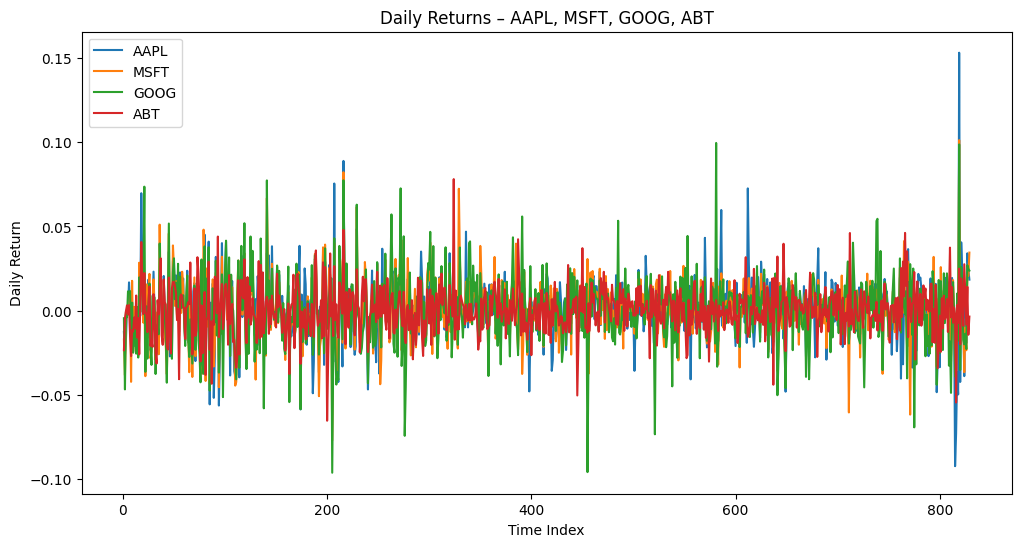

In [64]:
def plot_ticker_returns(tickers):
    # allow a single ticker string as input
    if isinstance(tickers, str):
        tickers = [tickers]
    # select the rows and transpose so time is on the x‐axis
    data = time_series.loc[tickers].T
    data.columns = tickers
    data.plot(figsize=(12, 6))
    plt.xlabel('Time Index')
    plt.ylabel('Daily Return')
    plt.title(f"Daily Returns – {', '.join(tickers)}")
    plt.legend()
    plt.show()

# example usage
plot_ticker_returns(['AAPL', 'MSFT', 'GOOG', 'ABT'])


In [65]:
# Split static_data into separate DataFrames by year and align to time_series.index
for year in static_data['Year'].unique():
    # slice out this year's data
    df = static_data[static_data['Year'] == year].reset_index(drop=True)
    # reindex by ticker to match time_series rows
    df = df.set_index('Ticker').reindex(time_series.index).reset_index().drop(columns=['index', "Year"])

    # MEDIAN IMPUTATION... May change (but we have small amount of missing data )
    if df.isnull().values.any():
        df = df.fillna(df.median(numeric_only=True))

    globals()[f"static{year}"] = df
    df.to_csv(f"../data/static{year}.csv", index=False)  # Save as CSV
    print(f"static{year} aligned with time_series, shape {df.shape}, saved as static{year}.csv")

static2024 aligned with time_series, shape (496, 11), saved as static2024.csv
static2023 aligned with time_series, shape (496, 11), saved as static2023.csv
static2022 aligned with time_series, shape (496, 11), saved as static2022.csv
static2025 aligned with time_series, shape (496, 11), saved as static2025.csv


In [66]:
#& Save the labels and timeseries as dataframes
labels_df = pd.DataFrame(labels, columns=['Labels'])
labels_df.to_csv("../data/labels.csv", index=False)  # Save as CSV
time_series_df = pd.DataFrame(time_series)
time_series_df.to_csv("../data/time_series.csv", index=False)  # Save as CSV"""

# Save the ticker labels to a CSV file
ticker_labels = time_series.index
ticker_labels_df = pd.DataFrame(ticker_labels, columns=['Ticker'])
ticker_labels_df.to_csv('../data/ticker_labels.csv', index=False)

In [67]:
USE_HOURLY_DATA = True

if USE_HOURLY_DATA:
    #! TODO! 
    time_series = pd.read_csv("/yunity/arusty/PF-GAP/data/HourlyReturnsSingleYear.csv")
    #time_series = pd.read_csv("/yunity/arusty/PF-GAP/data/Hourly_Returns_2024-10(Labels-included).csv")
    labels = time_series.pop("Sector").values
    tickers = time_series.pop("Ticker").values

    
    # slice out this year's data
    df = static_data[static_data['Year'] == 2024].reset_index(drop=True)
    # reindex by ticker to match time_series rows
    df = df.set_index('Ticker').reindex(tickers).reset_index().drop(columns=["Ticker", "Year"])

    # MEDIAN IMPUTATION... May change (but we have small amount of missing data )
    if df.isnull().values.any():
        df = df.fillna(df.median(numeric_only=True))

    globals()[f"static2024"] = df

In [68]:
time_series.head()

,2024-04-24 14:30:00+00:00,2024-04-24 15:30:00+00:00,2024-04-24 16:30:00+00:00,2024-04-24 17:30:00+00:00,2024-04-24 18:30:00+00:00,2024-04-24 19:30:00+00:00,2024-04-25 13:30:00+00:00,2024-04-25 14:30:00+00:00,2024-04-25 15:30:00+00:00,2024-04-25 16:30:00+00:00,...,2025-04-22 17:30:00+00:00,2025-04-22 18:30:00+00:00,2025-04-22 19:30:00+00:00,2025-04-23 13:30:00+00:00,2025-04-23 14:30:00+00:00,2025-04-23 15:30:00+00:00,2025-04-23 16:30:00+00:00,2025-04-23 17:30:00+00:00,2025-04-23 18:30:00+00:00,2025-04-23 19:30:00+00:00
0,0.000478,0.006986,0.001957,-0.000947,0.000651,0.001362,-0.007094,-0.002679,0.002448,-0.002382,...,0.004624,0.000178,0.003059,0.007623,-0.012294,-0.001723,0.010551,-0.005315,-0.004580,0.004410
1,-0.005960,-0.000849,0.000325,0.001825,0.003094,-0.003383,-0.014151,-0.001165,0.010012,0.000251,...,0.004525,-0.000297,0.003645,0.013740,-0.013101,0.001366,0.002607,-0.004651,0.001990,0.002597
2,-0.007348,-0.000823,0.002555,0.002788,-0.000716,-0.001741,-0.012449,0.003611,0.004218,-0.001838,...,0.009541,0.000000,0.003306,0.042799,-0.007350,-0.015155,0.004479,-0.001032,-0.004341,-0.002426
3,-0.002938,-0.004155,0.001192,0.003572,-0.001483,-0.000446,0.006241,-0.003101,0.004444,0.001032,...,0.005090,0.001447,0.002709,0.008105,-0.009291,-0.005951,0.004753,-0.002275,-0.003464,0.001006
4,-0.005248,0.000274,0.003562,-0.001024,-0.001093,0.002257,-0.002730,-0.001711,0.001988,0.002668,...,0.007518,-0.002512,0.000741,0.040125,-0.011110,-0.008851,0.003993,-0.001446,-0.006880,0.001021


# Creating the Proximities

In [69]:
from QGAP.qgap import QGAP
qgap = QGAP(matrix_type="dense")
quant_prox = data_to_proximities(qgap, time_series, labels, None, static2024, None)


In [ ]:
qgap._estimator.oob_score_ # 0.6063618290258449 

#& Scores
#? Without static score on Monthly: 0.6063618290258449 
#* With Static Score on Monthly: 0.5766129032258065

#* Hourly for one Month: 0.5489021956087824
#* Hourly for on Year: 0.5511022044088176



0.5511022044088176

In [71]:
static2024.shape, time_series.shape, type(static2024)

((499, 11), (499, 1739), pandas.core.frame.DataFrame)

In [72]:
redcomets = REDCOMETS(variant = 3, static = np.array(static2024)) #static = XSTATIC
redcomets_prox = data_to_proximities(redcomets, time_series, labels, None, None, None)

In [73]:
redcomets.get_ensemble_oob_score() #

#&Scores
#* Without static score on Monthly: 0.837434078409388
#* Hourly for one Month: 0.805489573612338

np.float64(0.8012630561662024)

In [74]:
# Rocket
from RFGAP_Rocket.RFGAP_Rocket import RFGAP_Rocket

rf_rocket = RFGAP_Rocket(prediction_type = "classification", rocket = "Multi",
                         n_kernels=512) # Rocket Kwargs
rocket_prox = data_to_proximities(rf_rocket, time_series, labels, None, static2024 , None)


In [75]:
rf_rocket.rf_gap.oob_score_

#&Scores
#* Without static score on Monthly: 0.5308151093439364
#* Hourly for one Month: 0.4291417165668663

0.44288577154308617

In [ ]:
# # RDST
from RDST.rdst import RDST_GAP
rdst = RDST_GAP(save_transformed_data = True)
rdst_prox = data_to_proximities(rdst, time_series, labels, None, static2024 , None)

# rdst_prox = np.load("rdst_prox.npy")


In [ ]:
rdst._estimator.oob_score_ 

#&Scores
#* Without static score on Monthly: 0.5308151093439364
#* Hourly for one Month: 0.5249500998003992

0.5483870967741935

In [ ]:
time_series.shape

(496, 829)

In [ ]:
# This requires a channel dimension
time_series_reshaped = np.expand_dims(time_series.values, axis=1)

# Fresh Prince Tests
from FreshPrince.FreshPrince import FreshPRINCE_GAP
fresh_prince = FreshPRINCE_GAP()
fresh_prince_prox = data_to_proximities(fresh_prince, time_series_reshaped, labels, None, static2024 , None)

ModuleNotFoundError: FreshPRINCE_GAP requires package 'tsfresh' to be present in the python environment, but 'tsfresh' was not found. 'tsfresh' is a soft dependency and not included in the base aeon installation. Please run: `pip install tsfresh` to install the tsfresh package. To install all soft dependencies, run: `pip install aeon[all_extras]`

In [ ]:
#NOTE: THIS TAKES FOREVER
# sys.path.insert(0, '/yunity/arusty/PF-GAP/PFGAP')
# from PFGAP.PyPFGAP import PyPFGAP
# pf = PyPFGAP()
# pf_prox = data_to_proximities(pf, time_series, labels.astype(str), None, None, None)

# Read in the file that took nearly 1.5 hours to run
pf_prox = np.load("/yunity/arusty/PF-GAP/data/prox_files/pf_prox.npy")

In [ ]:
rocket_prox.shape, redcomets_prox.shape, quant_prox.shape, rdst_prox.shape

((501, 501), (501, 501), (501, 501), (501, 501))

In [ ]:
#& Save the data

# import os

# if USE_HOURLY_DATA:
#     prox_dir = "../data/prox_files_hourly"
# else:
#     prox_dir = "../data/prox_files_monthly"
    
# os.makedirs(prox_dir, exist_ok=True)

# np.save(os.path.join(prox_dir, "quant_prox.npy"), quant_prox)
# np.save(os.path.join(prox_dir, "redcomets_prox.npy"), redcomets_prox)
# np.save(os.path.join(prox_dir, "rocket_prox.npy"), rocket_prox)
# np.save(os.path.join(prox_dir, "rdst_prox.npy"), rdst_prox)
# np.save(os.path.join(prox_dir, "fresh_prince_prox.npy"), fresh_prince_prox)
# #np.save(os.path.join(prox_dir, "pf_prox.npy"), pf_prox)

# Clustering the data

In [ ]:
from sklearn.manifold import MDS
# Initialize MDS
def build_mds(prox):
    """
    TODO: Also check the label ordering is being preserved
    1. TODO
    - Try different parametres
    - Normalize (Min/Max) across the each row
    - Still apply the symmetric, and then then 1 - symmetric
    2. Try PHATE
    """
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    symetric = (prox + prox.T) / 2
    mds_prox = mds.fit_transform((1 - symetric)**2)
    return mds_prox

# Build MDS for each method
mds_quant = build_mds(quant_prox)
mds_redcomets = build_mds( redcomets_prox)
mds_rocket = build_mds(rocket_prox)
mds_rdst = build_mds(rdst_prox)
mds_pf = build_mds(pf_prox)


In [ ]:
np.unique(labels), len(labels) # NOTE: -1 is for missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 501)

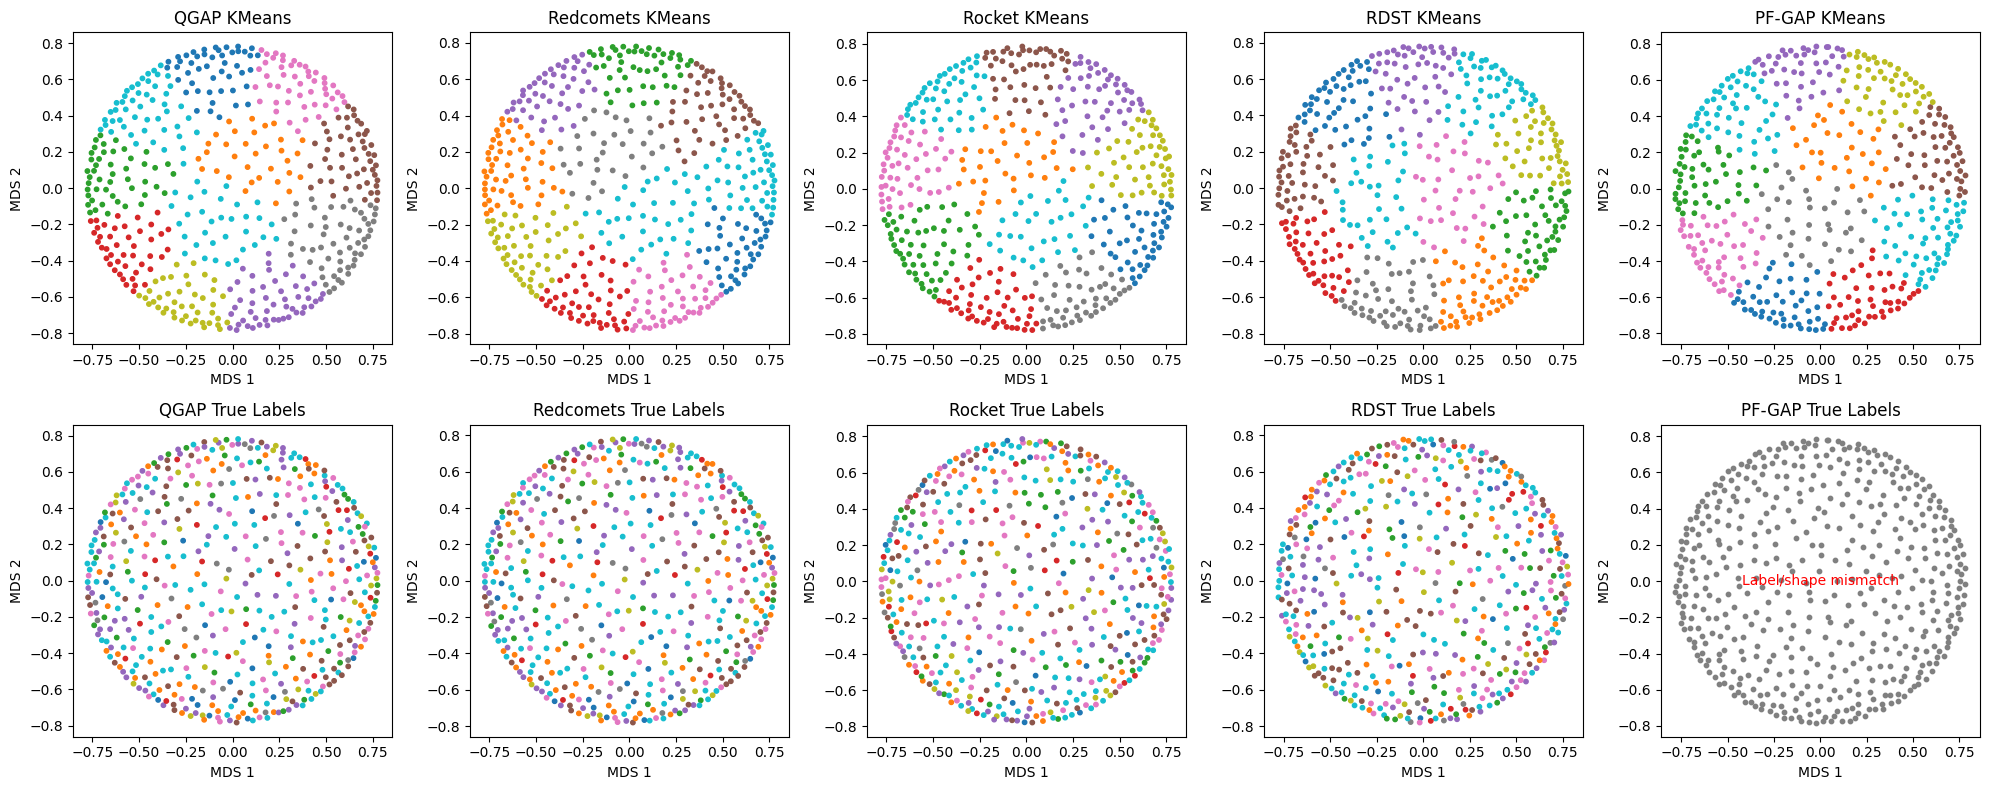

In [ ]:
from sklearn.cluster import KMeans

mds_vars = {
    "QGAP": mds_quant,
    "Redcomets": mds_redcomets,
    "Rocket": mds_rocket,
    "RDST": mds_rdst,
    "PF-GAP": mds_pf
}

n_clusters = len(np.unique(labels[labels >= 0]))  # ignore -1 (missing)

fig, axes = plt.subplots(2, len(mds_vars), figsize=(20, 8), gridspec_kw={'height_ratios': [4, 4]})

for col, (name, mds_data) in enumerate(mds_vars.items()):
    # KMeans clustering plot (top row)
    ax = axes[0, col]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(mds_data)
    scatter = ax.scatter(mds_data[:, 0], mds_data[:, 1], c=clusters, cmap='tab10', s=10)
    ax.set_title(f"{name} KMeans")
    ax.set_xlabel("MDS 1")
    ax.set_ylabel("MDS 2")

    # True labels plot (bottom row)
    ax2 = axes[1, col]
    # Only plot points with valid labels
    if mds_data.shape[0] == labels.shape[0]:
        valid = labels >= 0
        ax2.scatter(mds_data[valid, 0], mds_data[valid, 1], c=labels[valid], cmap='tab10', s=10)
    else:
        # If shape mismatch, plot all points in gray and show a warning
        ax2.scatter(mds_data[:, 0], mds_data[:, 1], color='gray', s=10)
        ax2.text(0.5, 0.5, "Label/shape mismatch", transform=ax2.transAxes, ha='center', va='center', color='red')
    ax2.set_title(f"{name} True Labels")
    ax2.set_xlabel("MDS 1")
    ax2.set_ylabel("MDS 2")

plt.tight_layout()
plt.show()

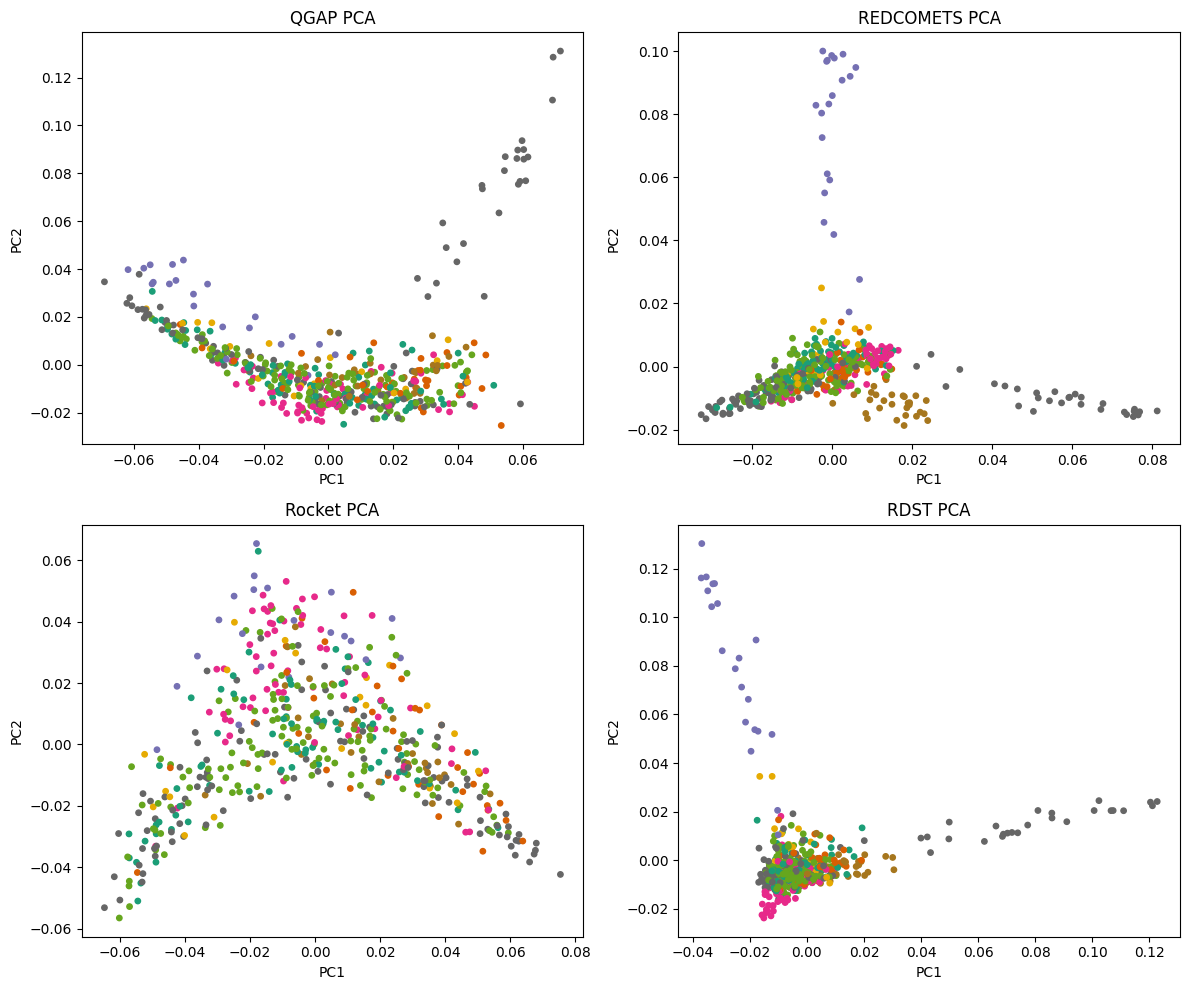

In [ ]:
from sklearn.decomposition import PCA

def plot_pca_in_grid(matrices, titles):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    for ax, matrix, title in zip(axes.flat, matrices, titles):
        pca = PCA(n_components=2)
        reduced = pca.fit_transform(matrix)
        ax.scatter(reduced[:, 0], reduced[:, 1], c=labels.astype(int), cmap='Dark2', s=15)
        ax.set_title(title)
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
    plt.tight_layout()
    plt.show()

matrices = [quant_prox, redcomets_prox, rocket_prox, rdst_prox]
titles = ["QGAP PCA", "REDCOMETS PCA", "Rocket PCA", "RDST PCA"]

plot_pca_in_grid(matrices, titles)

# Determining Feature importance
-> Did the static features turn out important at all?

Time series Features range O to 1644
Static Features range 1644 to 1655


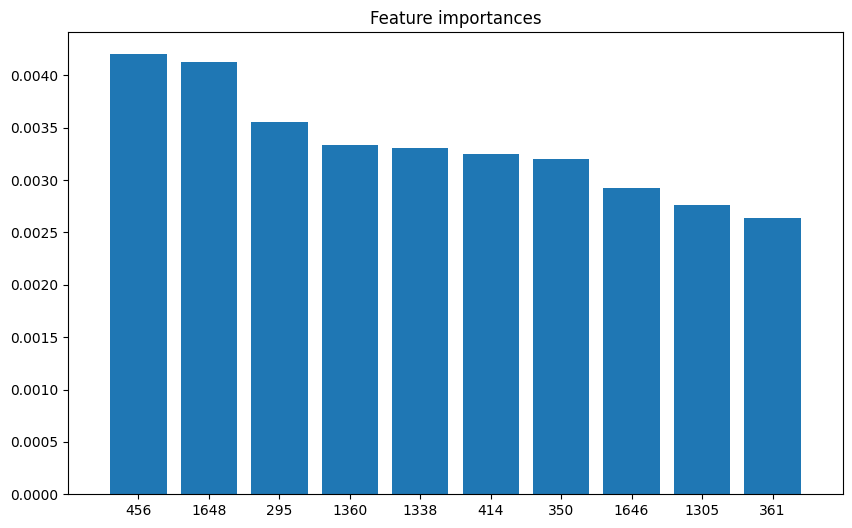

In [ ]:
from QGAP.qgap import QGAP
qgap = QGAP(matrix_type="dense")

qgap.fit(time_series, labels, static = static2024)

# Retrieve feature importances:
importances = qgap._estimator.feature_importances_
# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

print(f"Time series Features range O to {len(importances) - 11}")
print(f"Static Features range {len(importances) - 11} to {len(importances)}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.show()


In [ ]:
static2024.shape, importances.shape

((501, 11), (1655,))

In [ ]:
# Extract and print feature importances for static variables
static_feature_importances = importances[-11:]  # Last 11 features correspond to static variables
static_feature_names = static2024.columns.tolist()

print("Feature Importances for Static Variables:")
for name, importance in zip(static_feature_names, static_feature_importances):
    print(f"{name}: {importance:.4f}")

Feature Importances for Static Variables:
PE Ratio: 0.0009
PB Ratio: 0.0007
PS Ratio: 0.0029
ROE: 0.0005
ROA: 0.0041
Debt/Equity: 0.0012
Current Ratio: 0.0015
Profit Margin: 0.0007
Revenue Growth YoY: 0.0004
EPS Growth Next 5Y: 0.0002
Market Cap: 0.0004


Time series Features range O to 30000
Static Features range 30000 to 30011
Feature Importances for Static Variables:
PE Ratio: 0.0000
PB Ratio: 0.0000
PS Ratio: 0.0003
ROE: 0.0000
ROA: 0.0009
Debt/Equity: 0.0001
Current Ratio: 0.0000
Profit Margin: 0.0000
Revenue Growth YoY: 0.0000
EPS Growth Next 5Y: 0.0000
Market Cap: 0.0000


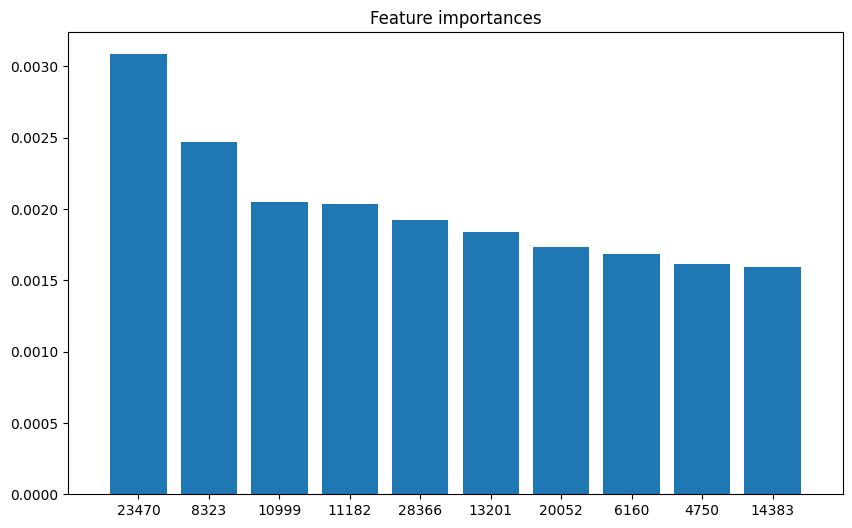

In [ ]:
### RDST Trials and Results ###

from RDST.rdst import RDST_GAP

rdst = RDST_GAP(save_transformed_data = True)

rdst.fit(time_series, labels, static = static2024)

# Retrieve feature importances:
importances = rdst._estimator.feature_importances_
# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Extract and print feature importances for static variables
static_feature_importances = importances[-11:]  # Last 11 features correspond to static variables
static_feature_names = static2024.columns.tolist()

print(f"Time series Features range O to {len(importances) - 11}")
print(f"Static Features range {len(importances) - 11} to {len(importances)}")

print("Feature Importances for Static Variables:")
for name, importance in zip(static_feature_names, static_feature_importances):
    print(f"{name}: {importance:.4f}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 10])
plt.show()

Time series Features range O to 4032
Static Features range 4032 to 8058
Feature Importances for Static Variables:
PE Ratio: 0.0001
PB Ratio: 0.0000
PS Ratio: 0.0000
ROE: 0.0000
ROA: 0.0003
Debt/Equity: 0.0000
Current Ratio: 0.0000
Profit Margin: 0.0000
Revenue Growth YoY: 0.0001
EPS Growth Next 5Y: 0.0000
Market Cap: 0.0002


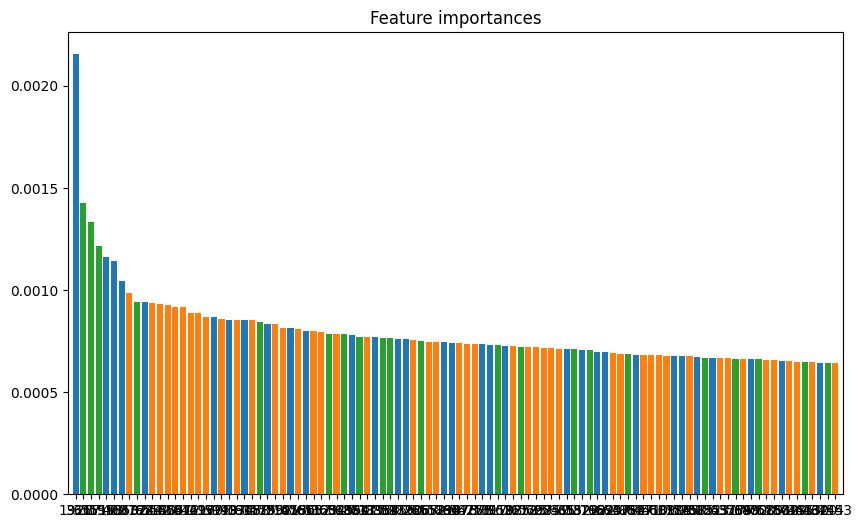

In [ ]:
### ROCKET Trials and Results ###

from RFGAP_Rocket.RFGAP_Rocket import RFGAP_Rocket

rf_rocket = RFGAP_Rocket(prediction_type = "classification", rocket = "Multi",
                         n_kernels=512)

rf_rocket.fit(time_series, labels, static = static2024, weights = 1) # THIS WEIGHTS STATIC as half important

# Retrieve feature importances:
importances = rf_rocket.rf_gap.feature_importances_
# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Extract and print feature importances for static variables
static_feature_importances = importances[-11:]  # Last 11 features correspond to static variables
static_feature_names = static2024.columns.tolist()

print(f"Time series Features range O to 4032")
print(f"Static Features range 4032 to {len(importances)}")

print("Feature Importances for Static Variables:")
for name, importance in zip(static_feature_names, static_feature_importances):
    print(f"{name}: {importance:.4f}")

# Create a color list: blue for time series, orange for static features
bar_colors = ['tab:blue' if idx <= 2016 else 'tab:green' if idx <= 4032 else 'tab:orange' for idx in indices[:100]]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(100), importances[indices[:100]], align="center", color=bar_colors)
plt.xticks(range(100), indices[:100])
plt.xlim([-1, 100])
plt.show()


# Test Accuracies
- Using RF Extend when applicable